In [1]:
import joblib
import numpy as np
import pandas as pd 
import model_arima as ar 
import model_lstm as lstm 
import mosqlient as mosq
from epiweeks import Week
from scipy.stats import boxcox
from scipy.special import inv_boxcox

import matplotlib.pyplot as plt 

from dotenv import load_dotenv
import os
load_dotenv()
api_key = os.getenv("api_key")

Load data for a specific city: 

In [2]:
geocode = 3106200

In [3]:
#df_c = pd.read_csv(f'data_{geocode}.csv.gz')

df_c = mosq.get_infodengue(api_key = api_key,
                            disease = 'dengue', 
                          start_date = '2010-01-01',
                          end_date = '2025-11-10',
                          geocode = geocode)

df_c.data_iniSE = pd.to_datetime(df_c.data_iniSE)

df_c.head()

100%|███████████████████████████████████████| 2/2 [00:02<00:00,  1.21s/requests]


,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,...,nivel_inc,umidmed,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf
0,2010-01-03,201001,339.0,339,339.0,339,3106200,0.0,13.444037,0,...,1,66.123600,47.285714,25.230602,29.714286,215.0,None,None,None,None
1,2010-01-10,201002,490.0,490,490.0,490,3106200,0.0,19.432384,0,...,1,63.838935,44.000000,26.232493,30.857143,319.0,None,None,None,None
2,2010-01-17,201003,587.0,587,587.0,587,3106200,0.0,23.279203,0,...,1,63.000000,44.000000,25.621849,30.857143,416.0,None,None,None,None
3,2010-01-24,201004,903.0,903,903.0,903,3106200,0.0,35.811108,0,...,2,65.758403,48.000000,25.070904,29.000000,662.0,None,None,None,None
4,2010-01-31,201005,1140.0,1140,1140.0,1140,3106200,0.0,45.210037,0,...,2,57.623949,40.714286,26.349790,30.142857,840.0,None,None,None,None


Visualizando a série histórica:

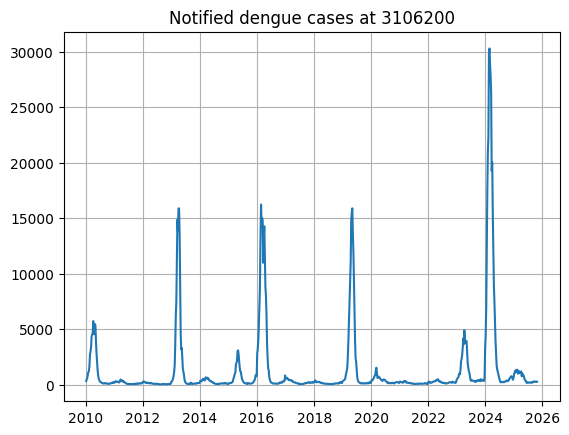

In [4]:
_,ax = plt.subplots()

ax.plot(df_c.data_iniSE, df_c.casos_est)

ax.grid()

ax.set_title(f'Notified dengue cases at {geocode}')
plt.show()

### Modelo arima: 

Organização necessária para os dados:

In [5]:
df_ar = df_c[['data_iniSE', 'casos_est']].rename(columns = {'data_iniSE': 'dates', 'casos_est':'y'})

df_ar.head()

,dates,y
0,2010-01-03,339.0
1,2010-01-10,490.0
2,2010-01-17,587.0
3,2010-01-24,903.0
4,2010-01-31,1140.0


Week(2024, 52).startdate()

Treinamento:

In [6]:
train_start_date = '2015-01-01'
train_end_date = '2024-12-22'

In [7]:
ar.train_model(df_ar, geocode, train_start_date = train_start_date, train_end_date = train_end_date)

/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2430.716, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2427.805, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2426.893, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2426.895, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2429.740, Time=0.01 sec


/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2422.893, Time=0.07 sec


/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-2435.113, Time=0.23 sec


/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-2441.817, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-2428.380, Time=0.06 sec


/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-2442.636, Time=0.31 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-2434.436, Time=0.11 sec


/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-2441.641, Time=0.53 sec


/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-2439.226, Time=0.54 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-2437.427, Time=0.10 sec


/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-2437.922, Time=0.75 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=-2434.196, Time=0.03 sec

Best model:  ARIMA(4,1,1)(0,0,0)[0] intercept
Total fit time: 3.709 seconds


/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Aplicação do modelo:

In [8]:
for_week = 1
df_apply = df_ar.loc[df_ar.dates.dt.date < Week(2025, for_week).startdate()]

In [9]:
df_for = ar.apply_model(df_apply, geocode)
df_for.head()

/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,date,pred,lower_50,upper_50,lower_80,upper_80,lower_90,upper_90,lower_95,upper_95
0,2024-12-29,459.332467,371.267530,580.293437,311.179817,731.823830,281.645868,850.675484,259.152168,977.241206
1,2025-01-05,457.451677,341.094126,639.388532,269.279693,905.328273,236.213591,1145.566706,212.015695,1434.409684
2,2025-01-12,444.523654,312.784882,671.492244,237.032230,1047.173338,203.663280,1430.477056,179.875868,1946.762493


df_for[['date', 'lower_95','lower_90', 'lower_80', 'lower_50',  'pred',
               'upper_50', 'upper_80', 'upper_90', 'upper_95']]

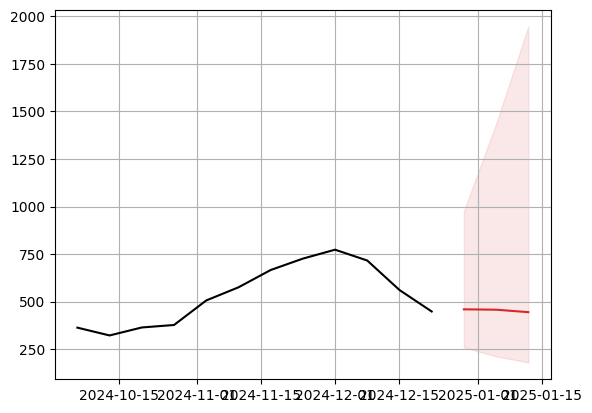

In [10]:
_,ax = plt.subplots()

ax.plot(df_apply.tail(12).dates, df_apply.tail(12).y, color = 'black')
ax.plot(df_for.date, df_for.pred, color = 'tab:red')

ax.fill_between(df_for.date, df_for.lower_95, df_for.upper_95, color = 'tab:red', alpha = 0.1)
ax.grid()

plt.show()

### Modelo LSTM:

Funções auxiliares para a organização dos dados: 

In [11]:
def calcular_metricas_por_janela(array, tamanho_janela, funcoes):
    # Criar um array com as janelas deslizantes
    janelas = np.lib.stride_tricks.sliding_window_view(array, tamanho_janela)

    # Aplicar as funções de interesse em cada janela
    resultados = [func(janela, axis=0) for func in funcoes for janela in janelas]
    
    return np.array(resultados)

def get_slope(casos, axis = 0): 
     
    return np.polyfit(np.arange(0,4), casos, 1)[0]

In [12]:
df_lstm = df_c[['data_iniSE', 'casos_est', 'Rt', 'tempmed', 'umidmed']].rename(columns = {
    'data_iniSE': 'date', 
    'casos_est': 'casos'
})

    
df_lstm.set_index('date', inplace = True)

df_lstm['casos'] = boxcox(df_lstm.casos+1, lmbda=0.05)

df_lstm['SE'] = [Week.fromdate(x) for x in df_lstm.index]
    
df_lstm['SE'] = df_lstm['SE'].astype(str).str[-2:].astype(int)
    
df_lstm['SE'] = df_lstm['SE'].replace(53,52)
    
df_lstm['diff_casos'] = np.concatenate( (np.array([np.nan]), np.diff(df_lstm['casos'], 1)))
    
array = np.array(df_lstm.casos)
tamanho_janela = 4
    
df_lstm['casos_mean'] =  np.concatenate( (np.array([np.nan, np.nan, np.nan]), calcular_metricas_por_janela(array, tamanho_janela, [np.mean])))
    
df_lstm['casos_std'] =  np.concatenate( (np.array([np.nan, np.nan, np.nan]), calcular_metricas_por_janela(array, tamanho_janela, [np.std])))
    
df_lstm['casos_slope'] =  np.concatenate( (np.array([np.nan, np.nan, np.nan]), calcular_metricas_por_janela(array, tamanho_janela, [get_slope])))

df_lstm = df_lstm.dropna()
df_lstm.head()

,casos,Rt,tempmed,umidmed,SE,diff_casos,casos_mean,casos_std,casos_slope
date,,,,,,,,,
2010-01-24,8.108548,0.000000,25.070904,65.758403,4,0.598024,7.412497,0.482851,0.427073
2010-01-31,8.437688,0.000000,26.349790,57.623949,5,0.329139,7.830104,0.466285,0.412012
2010-02-07,8.549319,1.412926,24.943207,63.743592,6,0.111631,8.151520,0.403998,0.344552
2010-02-14,8.975798,1.514897,26.871174,58.762304,7,0.426479,8.517838,0.310105,0.271338
2010-02-21,9.688079,1.974079,26.126050,63.339286,8,0.712281,8.912721,0.490631,0.417765


In [13]:
feat = df_lstm.shape[1]
HIDDEN = 64
LOOK_BACK = 4
PREDICT_N = 3

model = lstm.build_lstm(hidden=HIDDEN, features=feat, predict_n=PREDICT_N, look_back=LOOK_BACK,
                            batch_size=4, loss='mse')

model.compile(loss='mse', optimizer='adam', metrics=["accuracy", "mape", "mse"])


lstm.train_model(model,df_lstm, geocode, doenca='dengue',
                    end_train_date=None,
                    ratio = 1,
                    ini_date = train_start_date,
                    end_date = train_end_date,
                    min_delta=0.001, label='city',
                    patience = 30, 
                    epochs=300,
                    batch_size=4,
                    predict_n=PREDICT_N,
                    look_back=LOOK_BACK)


/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/eduardoaraujo/Documents/Github/short_term_data_platform/model_lstm.py:424: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = max_features[target_col]


Training fold 1...
Training fold 2...
Training fold 3...
Training fold 4...


(<Functional name=functional, built=True>,
 <keras.src.callbacks.history.History at 0x14bc37140>)

Make the forecast: 

In [14]:
model_name = f'trained_{geocode}_dengue_city'

df_for = lstm.apply_forecast(df_lstm, geocode, None, end_date =train_end_date, end_train_date = train_end_date, look_back=4, predict_n=3, model_name=model_name)


df_for.head() 

/Users/eduardoaraujo/Documents/Github/short_term_data_platform/model_lstm.py:112: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = max_features[target_col]


,date,lower_95,lower_90,lower_80,lower_50,pred,upper_50,upper_80,upper_90,upper_95
0,2024-12-29,339.531498,356.040710,396.095761,429.711029,458.239670,494.652893,561.282184,590.422815,614.308795
1,2025-01-05,400.270895,406.835114,471.993900,518.006409,576.462280,625.188751,714.032086,754.657742,830.969714
2,2025-01-12,442.701555,471.890981,539.335925,629.786163,710.518372,809.624649,905.423560,1000.653821,1129.036502


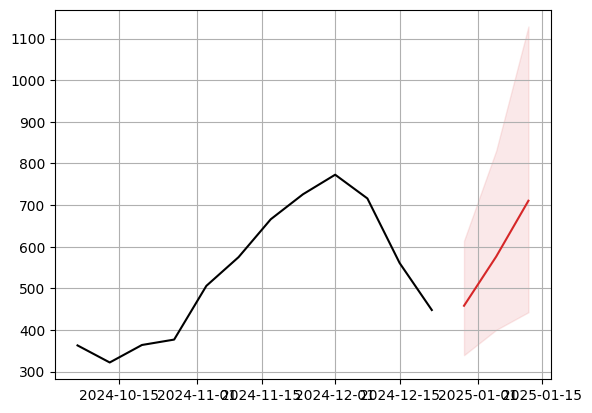

In [15]:
_,ax = plt.subplots()

ax.plot(df_apply.tail(12).dates, df_apply.tail(12).y, color = 'black')
ax.plot(df_for.date, df_for.pred, color = 'tab:red')

ax.fill_between(df_for.date, df_for.lower_95, df_for.upper_95, color = 'tab:red', alpha = 0.1)
ax.grid()

plt.show()

In [16]:
Week.train_end_date

AttributeError: type object 'Week' has no attribute 'train_end_date'

In [ ]:
str(Week.fromdate(pd.to_datetime(train_end_date)))

In [21]:
Week(2025, 1).startdate().strftime('%Y-%m-%d')

'2024-12-29'

In [23]:
df_c.SE.max()

202544

In [26]:
from datetime import timedelta

In [27]:
Week(2025, 1).startdate()- timedelta(days = 7)

datetime.date(2024, 12, 22)